Houseprice prediction

In [3]:
import pandas as pd

data=pd.read_csv("Housing.csv")
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
#no duplicate rows

In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
data.iloc[:, 5:9].describe()

,mainroad,guestroom,basement,hotwaterheating
count,545,545,545,545
unique,2,2,2,2
top,yes,no,no,no
freq,468,448,354,520


In [9]:
cat_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","furnishingstatus","prefarea"]

data = pd.get_dummies(
    data,
    columns=cat_cols,
    drop_first=False
)

In [10]:
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,True,False,False,False,True
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,False,True,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,True,False,False,False,True
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,False,False,True,True,False
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,False,False,True,True,False
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterheating_no               545 non-null    b

In [12]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,True,False,False,False,True
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,False,True,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,True,False,False,False,True
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,False,True,False
5,10850000,7500,3,3,1,2,False,True,True,False,...,True,True,False,False,True,False,True,False,False,True
6,10150000,8580,4,3,4,2,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
7,10150000,16200,5,3,2,0,False,True,True,False,...,False,True,False,True,False,False,False,True,True,False
8,9870000,8100,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,False,False,True
9,9800000,5750,3,2,4,1,False,True,False,True,...,False,True,False,False,True,False,False,True,False,True


In [13]:
print("range of house prices :")
print(data['price'].apply('min'),"-",data['price'].apply('max'))

range of house prices :
1750000 - 13300000


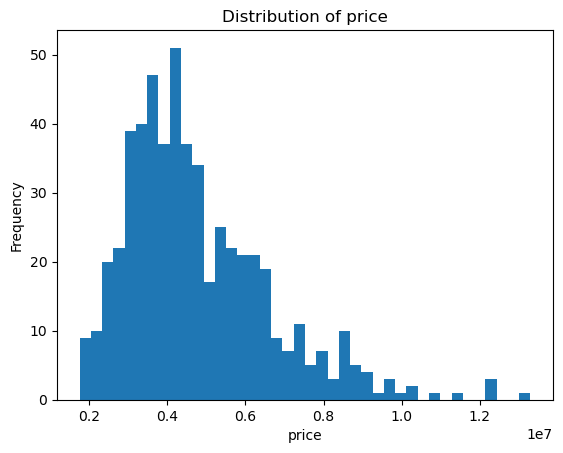

In [14]:
import matplotlib.pyplot as plt

plt.hist(data["price"], bins=40)
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title("Distribution of price")
plt.show()

as evident from the graph, it is right skewed 

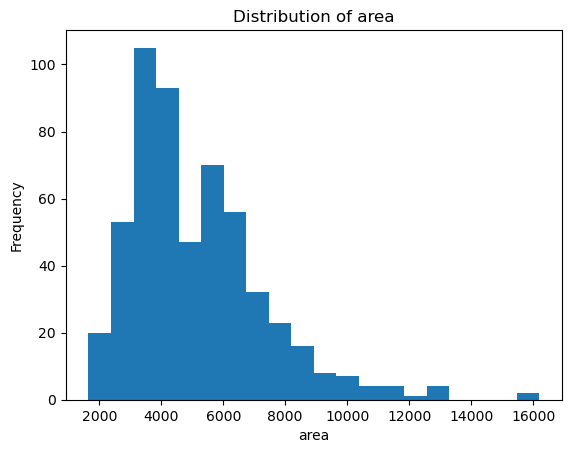

In [16]:
import matplotlib.pyplot as plt

plt.hist(data["area"], bins=20)
plt.xlabel("area")
plt.ylabel("Frequency")
plt.title("Distribution of area")
plt.show()

likewise distribution of area is also right skewed

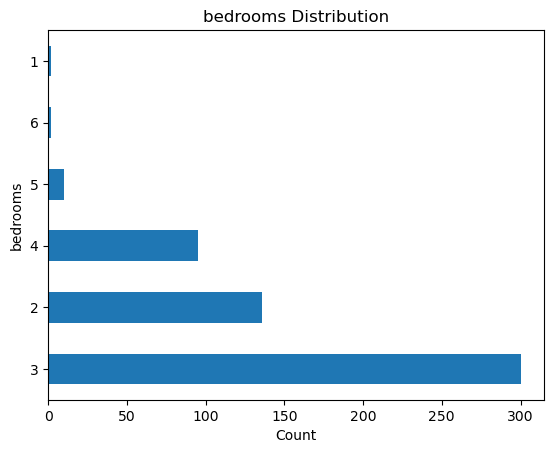

In [18]:
data["bedrooms"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("bedrooms")
plt.title("bedrooms Distribution")
plt.show()

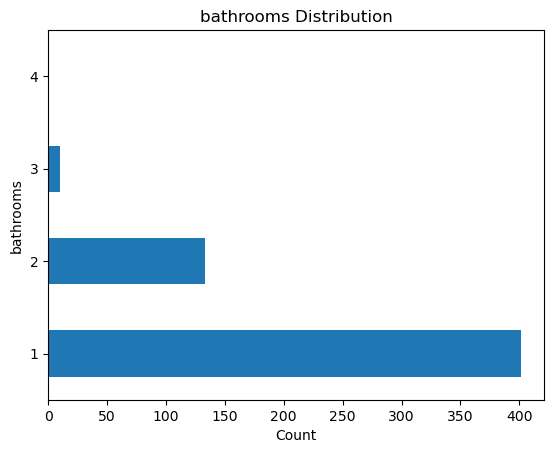

In [19]:
data["bathrooms"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("bathrooms")
plt.title("bathrooms Distribution")
plt.show()

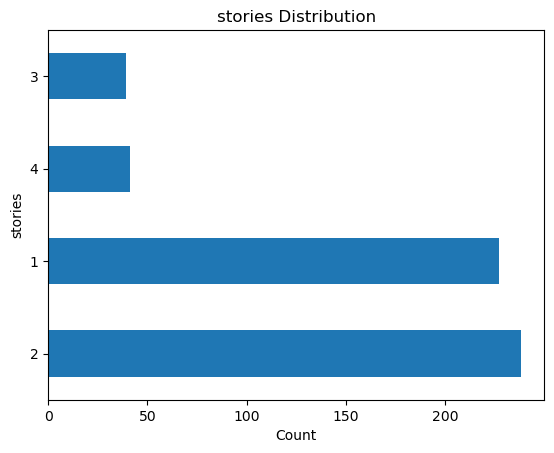

In [20]:
data["stories"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("stories")
plt.title("stories Distribution")
plt.show()

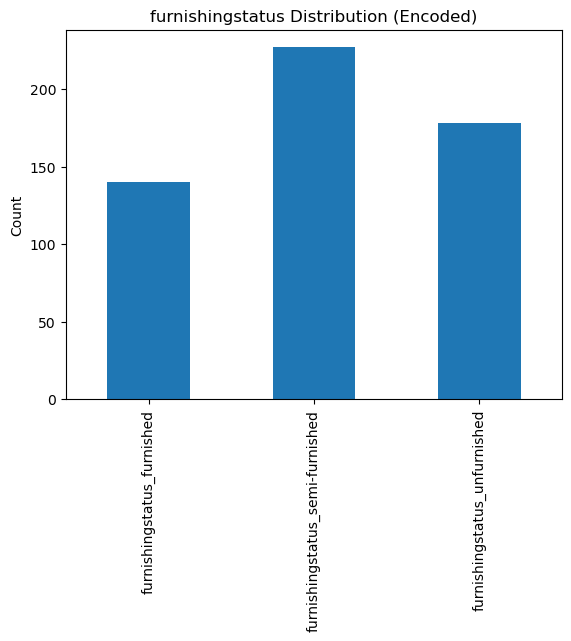

In [21]:
encoded_cols = [c for c in data.columns if c.startswith("furnishingstatus_")]

counts = data[encoded_cols].sum()

counts.plot(kind="bar")
plt.ylabel("Count")
plt.title("furnishingstatus Distribution (Encoded)")
plt.show()

In [22]:
import statsmodels.api as sm

X = data[["area", "bedrooms", "bathrooms", "stories", "parking"]]
y = data["price"]

X = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           4.37e-94
Time:                        18:39:21   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5

if we consider alpha or the error allowed as 0.05, p< alpha for all bedrooms, bathrooms, and stories, hence they effectively help in predicting the price of the house. 

In [24]:
import scipy.stats as stats

stats.f_oneway(
    data[data["mainroad_yes"]==1]["price"],
    data[data["mainroad_no"]==1]["price"]
)


F_onewayResult(statistic=52.491839182617746, pvalue=1.4901041488911911e-12)

In [25]:
stats.f_oneway(
    data[data["guestroom_yes"]==1]["price"],
    data[data["guestroom_no"]==1]["price"]
)

F_onewayResult(statistic=37.928275845312754, pvalue=1.429113638558578e-09)

In [27]:
stats.f_oneway(
    data[data["basement_yes"]==1]["price"],
    data[data["basement_no"]==1]["price"]
)

F_onewayResult(statistic=19.688569160218787, pvalue=1.1041051901319109e-05)

In [29]:
stats.f_oneway(
    data[data["hotwaterheating_yes"]==1]["price"],
    data[data["hotwaterheating_no"]==1]["price"]
)

F_onewayResult(statistic=4.744869662643256, pvalue=0.02981523896602993)

In [31]:
stats.f_oneway(
    data[data["airconditioning_yes"]==1]["price"],
    data[data["airconditioning_no"]==1]["price"]
)

F_onewayResult(statistic=140.16272089218597, pvalue=6.310969853532361e-29)

In [33]:
stats.f_oneway(
    data[data["prefarea_yes"]==1]["price"],
    data[data["prefarea_no"]==1]["price"]
)

F_onewayResult(statistic=66.25864622289646, pvalue=2.7183744670735454e-15)

In [35]:
stats.f_oneway(
    data[data["furnishingstatus_furnished"]==1]["price"],
    data[data["furnishingstatus_semi-furnished"]==1]["price"],
    data[data["furnishingstatus_unfurnished"]==1]["price"]
)

F_onewayResult(statistic=28.272068447164575, pvalue=2.0928668857951646e-12)

since all p values < 0.05, all are effective predictors of price

In [38]:
#creating a single regression model based on the different predictors

In [40]:
import numpy as np
data["price_log"] = np.log(data["price"])
data["area_log"] = np.log(data["area"])
# for price and area since these are right skewed

In [46]:
#now these seem better and closer to the guassian curve

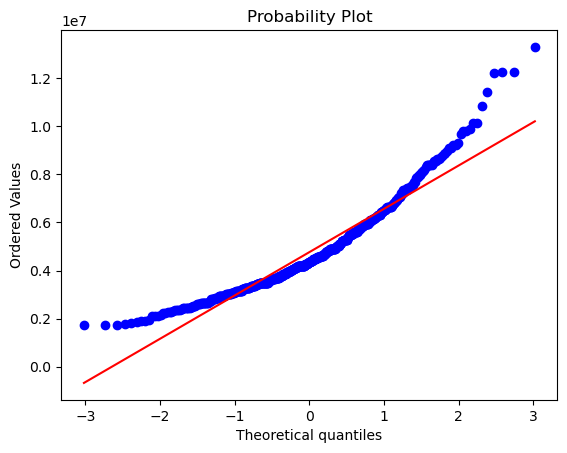

In [48]:
import scipy.stats as stats
stats.probplot(data["price"], plot=plt)
plt.show()

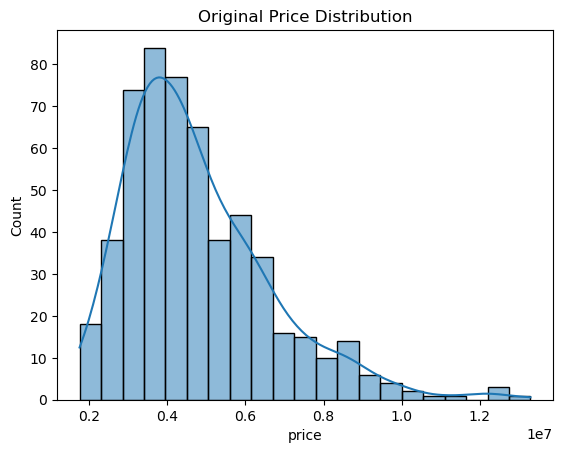

In [52]:
sns.histplot(data["price"], kde=True)
plt.title("Original Price Distribution")
plt.show()

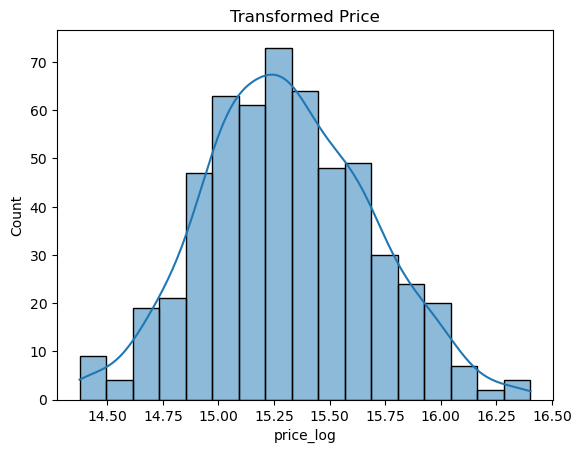

In [56]:
sns.histplot(data["price_log"], kde=True)
plt.title("Transformed Price")
plt.show()

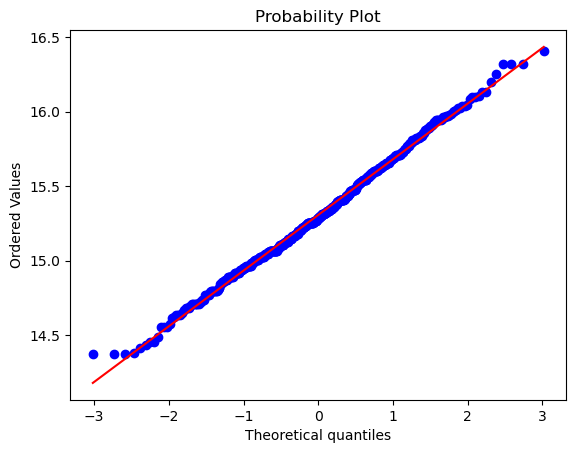

In [160]:
stats.probplot(data["price_log"], plot=plt)
plt.show()

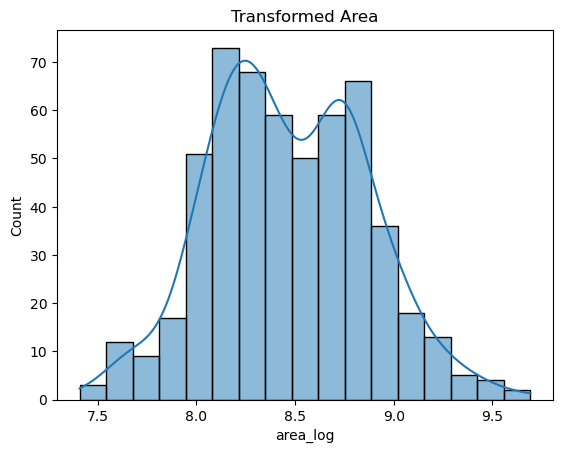

In [70]:
sns.histplot(data["area_log"], kde=True)
plt.title("Transformed Area")
plt.show()

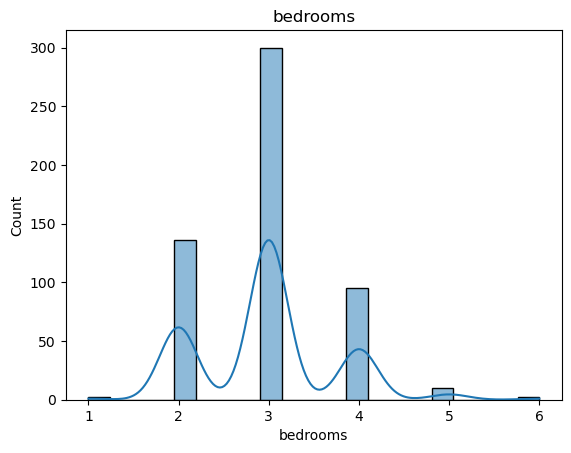

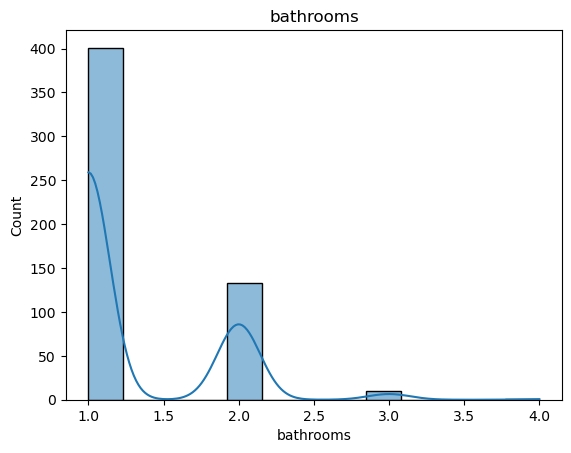

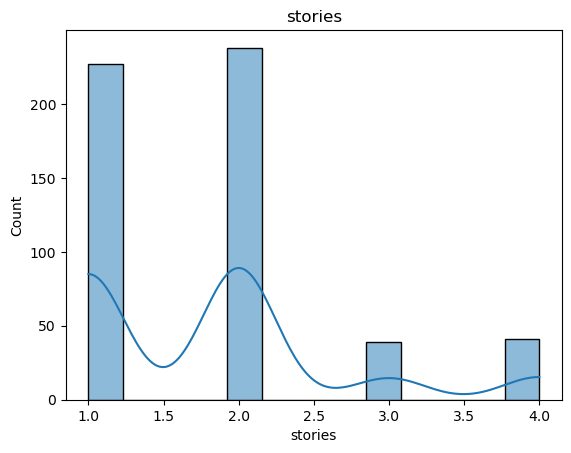

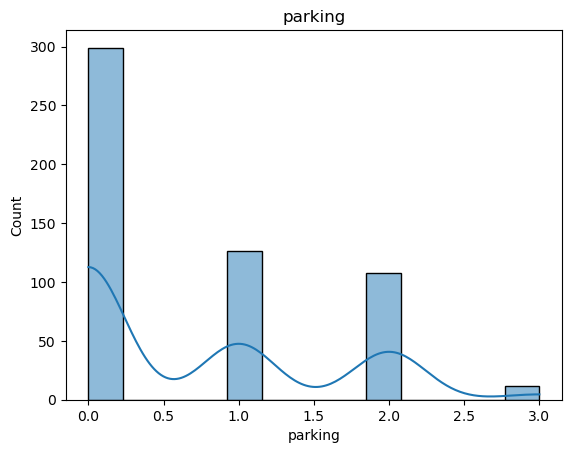

In [80]:
num_cols = data.select_dtypes(include="number").columns.drop(["price","price_log","area","area_log"], errors="ignore")

for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()

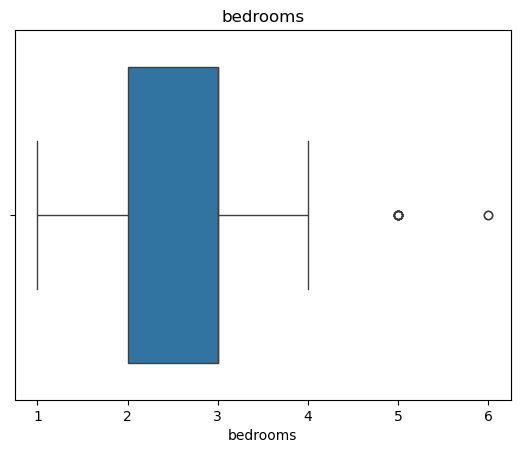

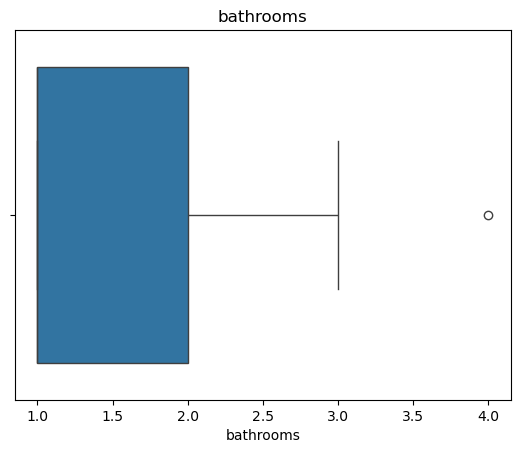

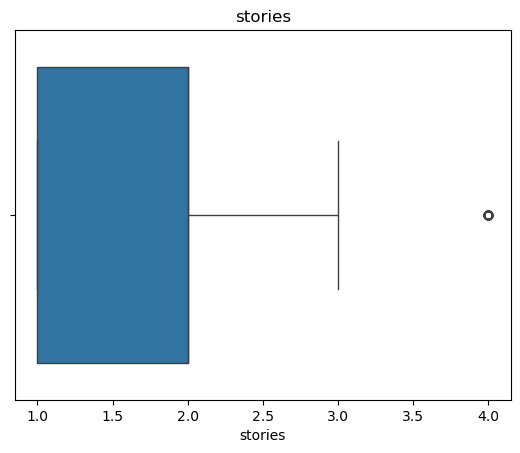

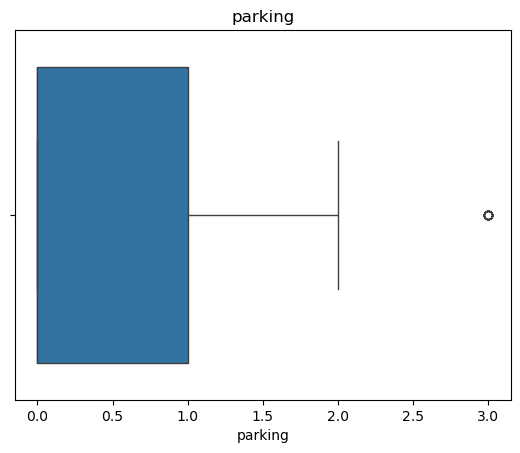

In [82]:
for col in num_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


In [84]:
Q1 = data[col].quantile(0.01)
Q99 = data[col].quantile(0.99)
data[col] = data[col].clip(Q1, Q99)

In [138]:
y = data["price_log"]
X = data.drop(columns=["price", "price_log", "area"])

In [140]:
num_cols = [
    col for col in X.columns
    if col in ["area_log", "bathrooms", "bedrooms", "stories", "parking"]
]
cat_cols = [col for col in X.columns if col not in num_cols]

In [142]:
from sklearn.model_selection import train_test_split

# X = features, y = target (log-price)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [146]:
X_train[num_cols].describe().loc[["mean", "std"]]

,bedrooms,bathrooms,stories,parking,area_log
mean,1.629685e-16,7.333583e-17,6.926162e-17,-6.518741e-17,1.401529e-15
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00


In [148]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [150]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.24925762462767728
R²: 0.6782341334497209


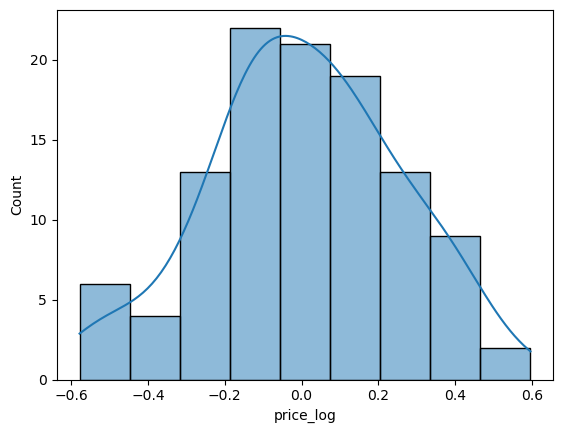

In [152]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.show()

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

svr = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False is safe for sparse OHE
    ("model", SVR(kernel="rbf", C=10, epsilon=0.1, gamma="scale"))
])

svr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('model', SVR(C=10))])

In [156]:
y_pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE (log-price):", rmse)
print("R²:", r2)

RMSE (log-price): 0.2746996752514295
R²: 0.6091956766017943


In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__C": [1, 10, 100],
    "model__epsilon": [0.05, 0.1, 0.2],
    "model__gamma": ["scale", 0.1, 0.01]
}

grid = GridSearchCV(svr, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)
best_svr = grid.best_estimator_

Best params: {'model__C': 1, 'model__epsilon': 0.05, 'model__gamma': 0.01}
Best CV RMSE: 0.19362631665752267
